##  1. EDA 및 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('C:/Users/s/Desktop/udemy/ML/4. minimizing churn rate through analysis of financial habits/P39-Minimizing-Churn-Data/churn_data.csv')

In [3]:
# EDA
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### Removing NaN

In [6]:
dataset.isna().any() # any는 최소 하나의 na가 포함된 열을 출력해준다.

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [7]:
# null 의 갯수가 적다면 지워줘도 되지만 과도하게 많은 경우 모델에 포함시킬 이유가 없을 수 있다.
# 총 27000개의 데이터 중에 얼마나 na가 존재할까
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [8]:
# age는 4개의 null 이 포함된 행만 제거 하겠습니다. 27000개중 4개밖에 없으니까요.
dataset = dataset[pd.notnull(dataset['age'])] # 해당 되는 특정 열에만 적용해 null이 아닌 행만 반환할 것입니다. 
dataset.describe() # 4개 행이 줄어들어 count 가 26996임을 확인

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,26996.000000,26996.000000,26996.000000,18969.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,...,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.00000,26996.000000,23773.000000,26996.000000,26996.000000
mean,35418.535302,0.413913,32.219921,542.944225,3.342051,0.307045,28.066677,3.273967,0.073789,92.639502,...,0.420988,0.001296,0.018818,0.018188,0.004890,0.17347,0.018077,29.110125,0.907819,0.318010
std,20319.620354,0.492542,9.964838,61.059315,9.131992,1.055488,42.221432,8.953651,0.437331,88.868773,...,0.912884,0.035984,0.135883,0.133633,0.069756,0.37866,0.133232,21.973478,0.751991,0.465712
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
25%,17808.750000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,9.000000,0.200000,0.000000
50%,35745.500000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,25.000000,0.780000,0.000000
75%,53236.750000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,114.000000,4.000000,1.000000


In [9]:
# 대량의 null이 있던 credit_score와 rewards_earned는 feature를 제거 하겠습니다. 
dataset = dataset.drop(columns=['credit_score', 'rewards_earned'])
dataset.describe() # 2개 컬럼 삭제 완료 확인.

,user,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
count,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,...,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.00000,26996.000000,26996.000000,26996.000000
mean,35418.535302,0.413913,32.219921,3.342051,0.307045,28.066677,3.273967,0.073789,92.639502,0.050637,...,0.587235,0.420988,0.001296,0.018818,0.018188,0.004890,0.17347,0.018077,0.907819,0.318010
std,20319.620354,0.492542,9.964838,9.131992,1.055488,42.221432,8.953651,0.437331,88.868773,0.871431,...,0.492340,0.912884,0.035984,0.135883,0.133633,0.069756,0.37866,0.133232,0.751991,0.465712
min,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,17808.750000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.200000,0.000000
50%,35745.500000,0.000000,30.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.780000,0.000000
75%,53236.750000,1.000000,37.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,...,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,4.000000,1.000000


### Histogram

In [13]:
dataset.dtypes

user                         int64
churn                        int64
age                        float64
housing                     object
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
reward_rate                float64
is_referred         

In [29]:
dataset2 = dataset.drop(columns=['user', 'churn']) # 식별자 변수와 반응변수 제거



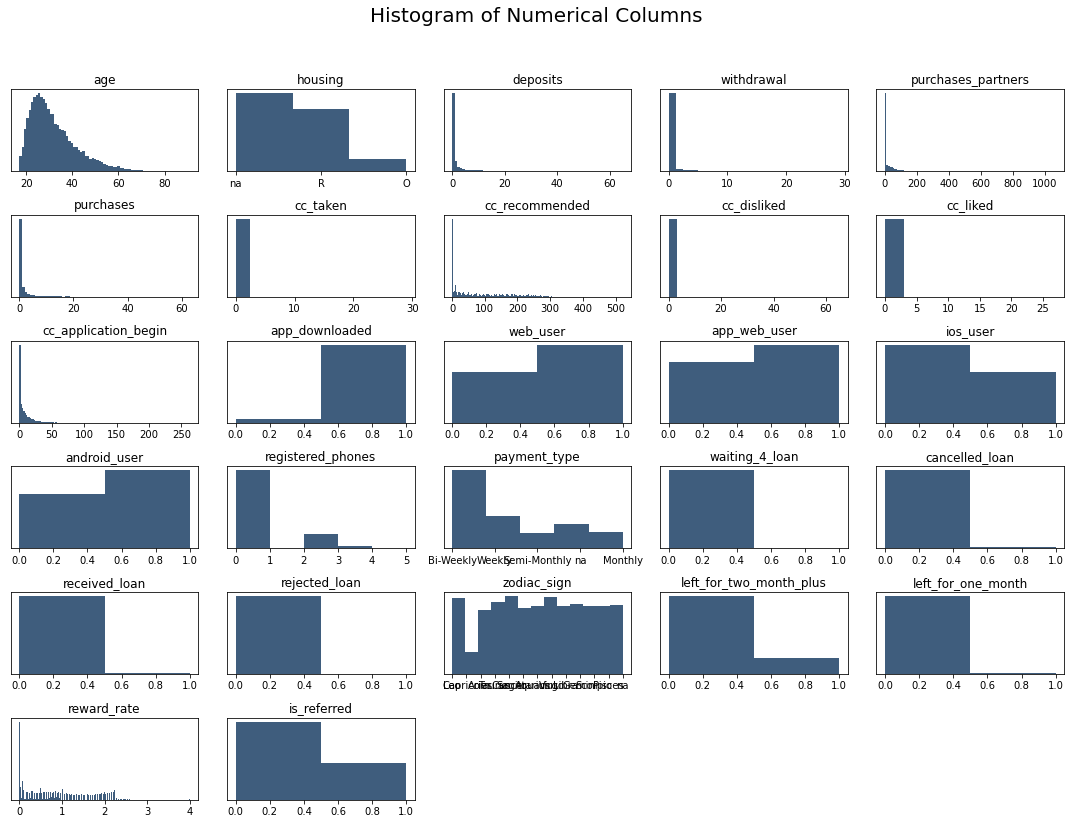

In [35]:
# 저번 시간 만들었던 histogram 과 유사하게 코드를 사용하겠습니다.
fig = plt.figure(figsize = (15,12))
plt.suptitle('Histogram of Numerical Columns', fontsize = 20)
for i in range(1, dataset2.shape[1]+1):
    plt.subplot(6,5,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False) # y라벨을 제거해 그래프에 너무 많은 내용이 들어가지 않게
    f.set_title(dataset2.columns.values[i-1])
    
    vals = np.size(dataset2.iloc[:, i-1].unique())
    plt.hist(dataset2.iloc[:,i-1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0,0.03,1,0.95]) # 각 하위 그래프 직사각형 크기를 지정해 겹치지 않게함
plt.show()

### PIE Chart of binary feature

In [40]:
# 원본데이터로 부터 이진특성만을 뽑아내보자.
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

C:\Users\s\AppData\Local\Temp/ipykernel_2932/1469542634.py:15: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values, labels = index, autopct='%1.1f%%')


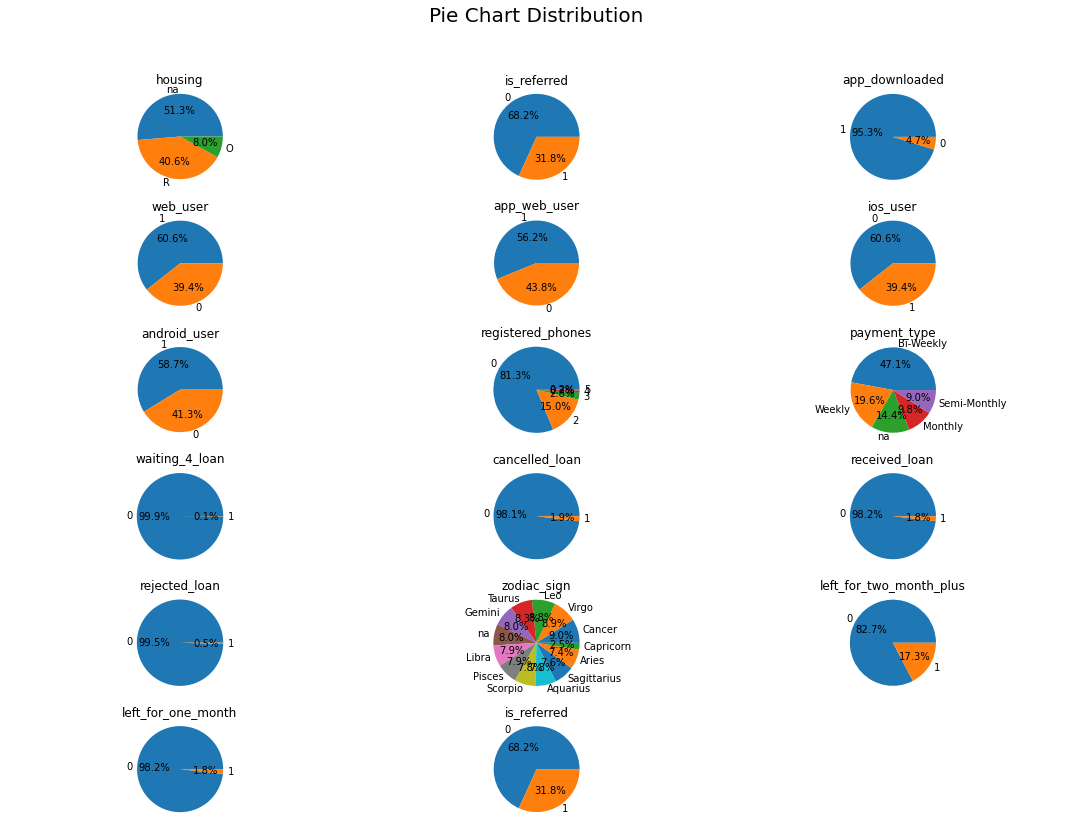

In [63]:
# 위 히스토그램 코드를 응용하여 pie chart 그리기
fig = plt.figure(figsize = (15,12))
plt.suptitle('Pie Chart Distribution', fontsize = 20)
for i in range(1, dataset2.shape[1]+1):
    plt.subplot(6,3,i) #17개 열
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False) # y라벨을 제거해 그래프에 너무 많은 내용이 들어가지 않게
    f.set_title(dataset2.columns.values[i-1])
    
    #vals = np.size(dataset2.iloc[:, i-1].unique()) 파이차트에서 필요 없지! 
    
    # pie chart 첫번 째 인자 values = 크기를 의미하는 값, # 두번쨰 인자 : label을 위해 #3번째 인자 : 분포값을 어떻게 표시할지
    values = dataset2.iloc[:, i-1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i-1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%') 
    plt.axis('equal') # 이렇게 지정시 이미지에 x혹은 y축이 표시되지 않습니다.
    
plt.tight_layout(rect=[0,0.03,1,0.95]) # 각 하위 그래프 직사각형 크기를 지정해 겹치지 않게함
plt.show()

waiting_4_loan, cancelled_loan, received_loan ,.... 등등 적은 1의 분포를 가진 feature들이 churn 반응변수를 예측하는 모델에 유용할지를 확인하기 위해 살펴볼 필요가 있을 것 같습니다.

In [65]:
# 확인 해봅시다. 반응변수와 위 작은 1 값은 가진 특성들과 비교
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()


1    266
0    222
Name: churn, dtype: int64

In [66]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [67]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [68]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [70]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()   # 한쪽으로 완젼히 치우쳐져 있지는 않군요

1    266
0    222
Name: churn, dtype: int64

 ### Correlation

<AxesSubplot:title={'center':'Correlation with the Response Variable'}>

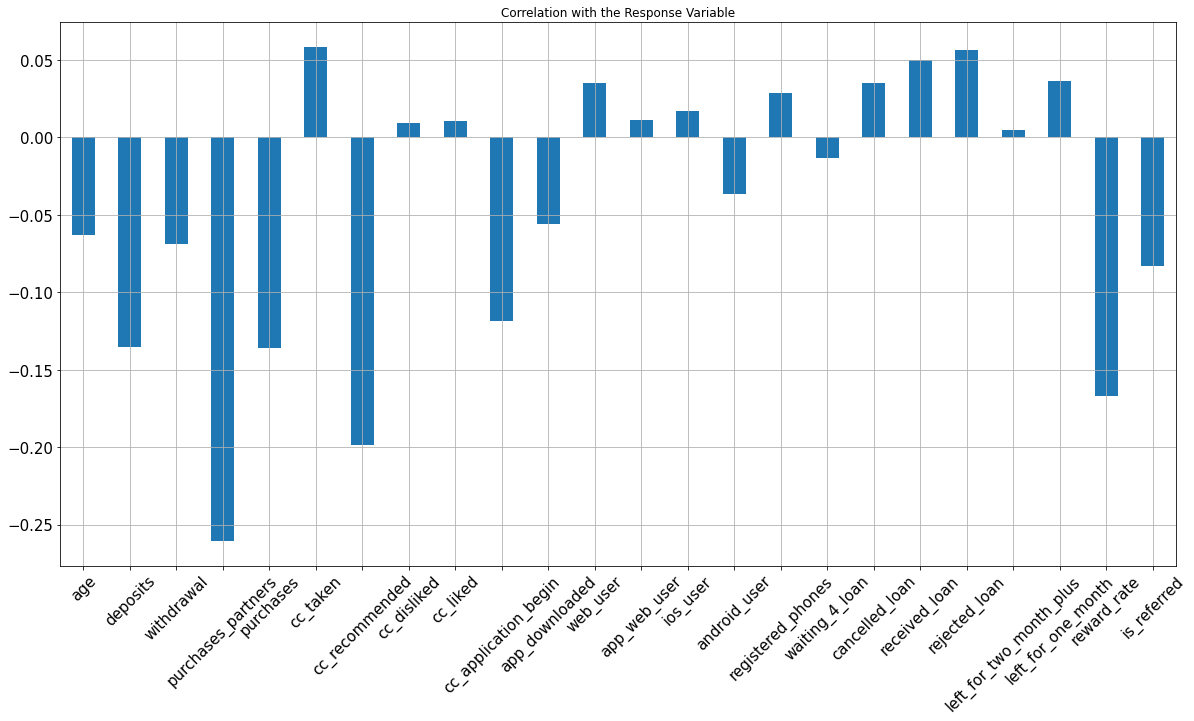

In [73]:
# 반응변수와 독립변수간 상관관계 범주형 변수를 지우고 이진 변수와 수치형 변수로 살펴보자
dataset.drop(columns=['churn','user','housing',
                      'payment_type','zodiac_sign']).corrwith(dataset.churn).plot.bar( # corrwith(반응변수)
    figsize = (20,10), title = 'Correlation with the Response Variable', fontsize = 15, rot = 45, grid=True) 

### Correlation matrix

C:\Users\s\AppData\Local\Temp/ipykernel_2932/876944832.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

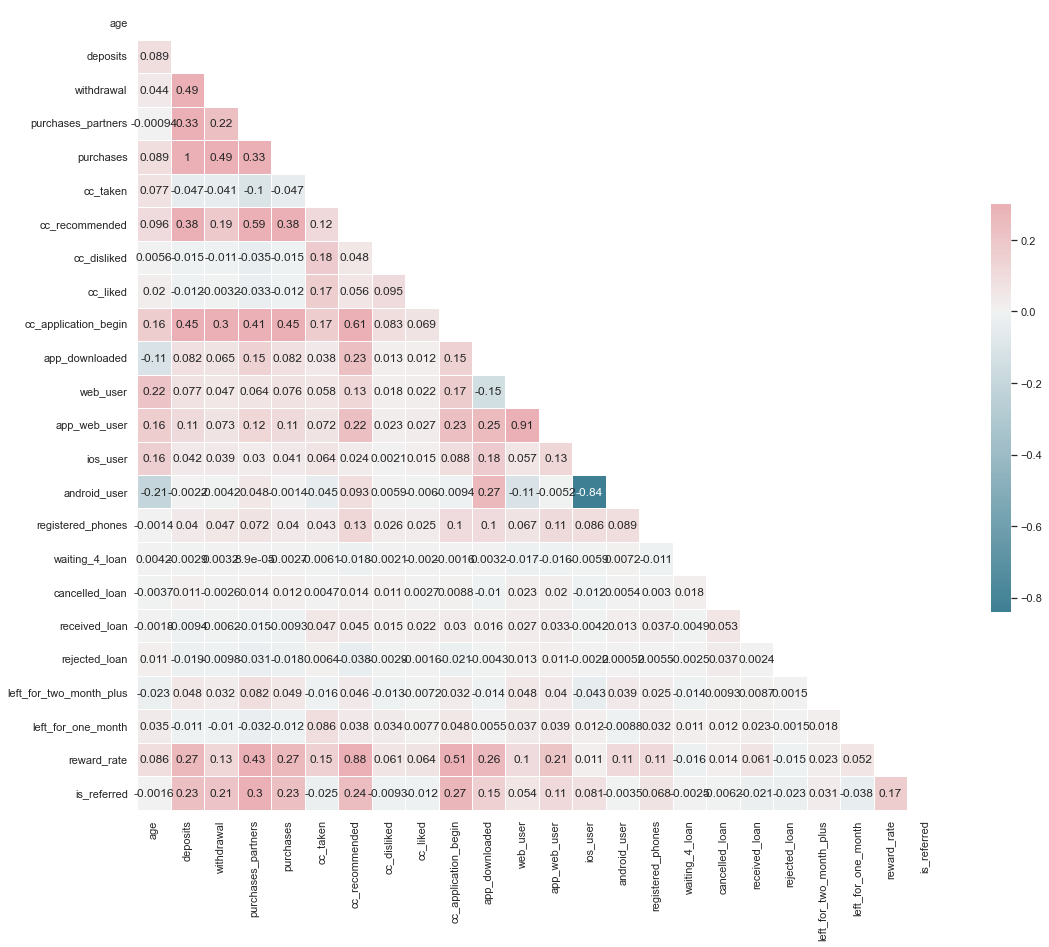

In [76]:
# 저번에 사용했던 예쁜 그래프를 사용해봅시다
## Correlation Matrix
sns.set(style="white")

#Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr() # 필요없는 변수 제거

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


andorid가 1 이면 ios는 0 이기 때문에 음의 상관관계는 직관적 이해 가능하다. 둘다 함께 사용하는 사람도 있기때문에 -1은 아닌것 같다.
-> 이럴 땐 연관성이 강하기 때문에 둘중 하나를 제거 하는 것이 편하다. 이와 비슷한 예 중 남성과 여성을 나타내는 두가지 특성이 있다면 하나를 제거해도 정보는 사라지지 않기 때문에 제거하는것이 맞다!

purchase와 deposit 또한 1의 상관관계를 보이며 app user, app_web 유저 또한 당연히 높은 상관관계를 보입니다. 

In [77]:
# 변수 삭제
dataset = dataset.drop(columns = ['app_web_user'])

In [78]:
# 데이터 내보내기
dataset.to_csv('C:/Users/s/Desktop/udemy/ML/4. minimizing churn rate through analysis of financial habits/P39-Minimizing-Churn-Data/new_churn_data2.csv', index = False)

## 2. 모델 구축

In [79]:
import random

In [81]:
user_identifier = dataset['user']
user_identifier

0        55409
1        23547
2        58313
3         8095
4        61353
         ...  
26995    24291
26996     4116
26997    23740
26998    47663
26999    52752
Name: user, Length: 26996, dtype: int64

In [84]:
dataset = dataset.drop(columns='user')
dataset.head()

,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,0,37.0,na,0,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,0,28.0,R,0,0,1,0,0,96,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,0,35.0,R,47,2,86,47,0,285,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,0,26.0,R,26,3,38,25,0,74,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,1,27.0,na,0,0,2,0,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


### one hot encoding
범주 변수를 고유의 독립된 이진 열로 변환 python은 범주변수를 읽지 못하며 따라서 독립변수를 찾지 못합니다. 하지만 이진 열은 읽을 수 있으므로 변환이 필요합니다.

In [86]:
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [87]:
# pd.get_dummies 를 활용해 원핫 인코딩을 수행하며 인자로 필요없습니다.
dataset = pd.get_dummies(dataset) 
dataset.columns
# 모든 범주형 변수가 분리된 것 같습니다.

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [88]:
# 원 핫 인코딩의 문제점 파타 
# 예를 들어 houing_na는 housing_r과 housing_o 가 0 일때 항상 1 값을 가집니다. 이 경우 상관관계가 만들어집니다. 
# 필드 사이의 상관관계를 제거하기 위해 원핫 인코딩 열 중 하나를 제거해야합니다.
dataset = dataset.drop(columns=['housing_na', 'zodiac_sign_na', 'payment_type_na']) # 어차피 na이므로 na을ㄹ 제거하자

### splitting the dataset

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'], test_size=0.2, random_state=0)

### Balancing the training set

balancing the training set 이 뭘까요?  예를 들어 보겠습니다. 아래 코드 y_train.value_counts() 로 0 이 12656개 1이 8940개가 나온 분포를 확인 할 수 있습니다. 이럴 경우 만약 모델이 재대로 작동하지 않아 반응변수를 모두 0으로 예측했다고 가정하면 정확도는 60%가 나오게 될 것입니다.
즉 모델이 제 역할을 수행하지 못함에도 불구하고 60%의 정확도를 보여주는 것이죠. 이를 대비하기 위해  Balancing 이 필요합니다.

In [90]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [94]:
# 우선 데이터 세트를 positive와 negative 값으로 분할하면서 시작합니다.
pos_index = y_train[y_train.values ==1].index
neg_index = y_train[y_train.values ==0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0) # 다음 코드에서 random함수를 사용할 것 이므로 복제가 가능하게
higher = np.random.choice(higher,size = len(lower)) # higher와 lower를 같은 값으로 만듭니다.
lower = np.asarray(lower)

new_indexes = np.concatenate((lower, higher))
x_train = x_train.loc[new_indexes, ]
y_train = y_train.loc[new_indexes]

### Feature Scailing

In [97]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train2 = pd.DataFrame(sc_x.fit_transform(x_train))
x_test2 = pd.DataFrame(sc_x.fit_transform(x_test)) # scaler가 numpy array를 반환하므로 pd.dataframe 씌워주기

In [98]:
x_train2.head() #열이름이 없네?

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.615809,-0.360630,-0.288998,-0.573514,-0.360101,-0.16929,-0.911953,-0.058862,-0.073238,-0.581763,...,-0.310907,-0.159022,-0.298632,-0.307433,-0.294839,-0.294839,-0.290447,-0.294503,-0.298743,-0.314464
1,-0.414688,-0.360630,-0.288998,-0.620321,-0.360101,-0.16929,0.317854,1.218394,-0.073238,-0.581763,...,-0.310907,-0.159022,-0.298632,-0.307433,3.391680,-0.294839,-0.290447,-0.294503,-0.298743,-0.314464
2,0.289235,-0.360630,-0.288998,-0.620321,-0.360101,-0.16929,2.003144,-0.058862,-0.073238,-0.247516,...,-0.310907,-0.159022,-0.298632,-0.307433,-0.294839,-0.294839,-0.290447,-0.294503,-0.298743,3.180015
3,0.590916,-0.360630,-0.288998,0.034981,-0.360101,-0.16929,-0.183179,-0.058862,-0.073238,0.003169,...,-0.310907,-0.159022,-0.298632,-0.307433,-0.294839,-0.294839,-0.290447,-0.294503,3.347354,-0.314464
4,-0.816930,-0.248618,-0.288998,-0.105441,-0.246026,-0.16929,-0.581727,-0.058862,-0.073238,-0.247516,...,-0.310907,-0.159022,-0.298632,-0.307433,-0.294839,3.391680,-0.290447,-0.294503,-0.298743,-0.314464


In [100]:
# 열이름 추가하기
x_train2.columns = x_train.columns.values
x_test2.columns = x_test.columns.values
x_train2.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
0,-0.615809,-0.360630,-0.288998,-0.573514,-0.360101,-0.16929,-0.911953,-0.058862,-0.073238,-0.581763,...,-0.310907,-0.159022,-0.298632,-0.307433,-0.294839,-0.294839,-0.290447,-0.294503,-0.298743,-0.314464
1,-0.414688,-0.360630,-0.288998,-0.620321,-0.360101,-0.16929,0.317854,1.218394,-0.073238,-0.581763,...,-0.310907,-0.159022,-0.298632,-0.307433,3.391680,-0.294839,-0.290447,-0.294503,-0.298743,-0.314464
2,0.289235,-0.360630,-0.288998,-0.620321,-0.360101,-0.16929,2.003144,-0.058862,-0.073238,-0.247516,...,-0.310907,-0.159022,-0.298632,-0.307433,-0.294839,-0.294839,-0.290447,-0.294503,-0.298743,3.180015
3,0.590916,-0.360630,-0.288998,0.034981,-0.360101,-0.16929,-0.183179,-0.058862,-0.073238,0.003169,...,-0.310907,-0.159022,-0.298632,-0.307433,-0.294839,-0.294839,-0.290447,-0.294503,3.347354,-0.314464
4,-0.816930,-0.248618,-0.288998,-0.105441,-0.246026,-0.16929,-0.581727,-0.058862,-0.073238,-0.247516,...,-0.310907,-0.159022,-0.298632,-0.307433,-0.294839,3.391680,-0.290447,-0.294503,-0.298743,-0.314464


In [102]:
#인덱스 이름 또한
x_train2.index = x_train.index.values
x_test2.index = x_test.index.values
x_train2.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11697,-0.615809,-0.360630,-0.288998,-0.573514,-0.360101,-0.16929,-0.911953,-0.058862,-0.073238,-0.581763,...,-0.310907,-0.159022,-0.298632,-0.307433,-0.294839,-0.294839,-0.290447,-0.294503,-0.298743,-0.314464
19770,-0.414688,-0.360630,-0.288998,-0.620321,-0.360101,-0.16929,0.317854,1.218394,-0.073238,-0.581763,...,-0.310907,-0.159022,-0.298632,-0.307433,3.391680,-0.294839,-0.290447,-0.294503,-0.298743,-0.314464
8356,0.289235,-0.360630,-0.288998,-0.620321,-0.360101,-0.16929,2.003144,-0.058862,-0.073238,-0.247516,...,-0.310907,-0.159022,-0.298632,-0.307433,-0.294839,-0.294839,-0.290447,-0.294503,-0.298743,3.180015
17887,0.590916,-0.360630,-0.288998,0.034981,-0.360101,-0.16929,-0.183179,-0.058862,-0.073238,0.003169,...,-0.310907,-0.159022,-0.298632,-0.307433,-0.294839,-0.294839,-0.290447,-0.294503,3.347354,-0.314464
25153,-0.816930,-0.248618,-0.288998,-0.105441,-0.246026,-0.16929,-0.581727,-0.058862,-0.073238,-0.247516,...,-0.310907,-0.159022,-0.298632,-0.307433,-0.294839,3.391680,-0.290447,-0.294503,-0.298743,-0.314464


In [103]:
# 원본 값으로 지정
x_train = x_train2
x_test = x_test2

### 모델 구축

In [105]:
# fitting model to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [106]:
# predicting test set
y_pred = classifier.predict(x_test)

In [112]:
# evaluating results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.6048148148148148

In [113]:
precision_score(y_test, y_pred) # 그다지 좋지는 않군 ...

0.5152346130408287

In [114]:
recall_score(y_test, y_pred)

0.7569382273948075

In [115]:
f1_score(y_test, y_pred)

0.6131254532269761

Test Data Accuracy: 0.6048


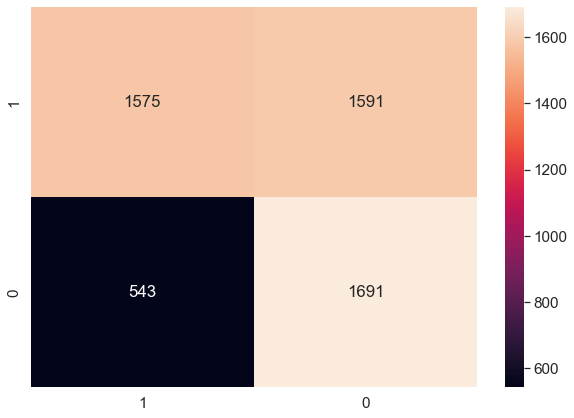

In [117]:
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### k-fold cross validation

In [121]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = LogisticRegression(random_state=0), X= x_train, y= y_train, cv=10)

In [122]:
accuracies

array([0.65604027, 0.65212528, 0.65659955, 0.63143177, 0.63199105,
       0.63478747, 0.64932886, 0.6549217 , 0.63702461, 0.64373602])

In [123]:
accuracies.mean()

0.6447986577181207

### Analyzing Coefficients
 정확도와 각 feature를 조합해 어떤 변수가 반응변수에 영향을 많이 주는지 알아보자


In [128]:
pd.concat([pd.DataFrame(x_train.columns, columns = ['features']),
          pd.DataFrame(np.transpose(classifier.coef_), columns=['coef'])],
         axis=1)

,features,coef
0,age,-0.150868
1,deposits,0.667130
2,withdrawal,0.053495
3,purchases_partners,-0.729895
4,purchases,-0.823355
5,cc_taken,0.081136
6,cc_recommended,0.070780
7,cc_disliked,0.005422
8,cc_liked,-0.000092
9,cc_application_begin,0.040930


### Feature Selection
 같은 정확도 라도 적은 feature을 사용한다면 모델의 빠르기와 데이터 저장비용등 장점이 많으므로 feature selection은 중요하다

In [129]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [130]:
classifier = LogisticRegression()

In [135]:
# 몇개의 특징을 선택해야 하나? 
x_train.shape

(17880, 41)

In [136]:
rfe = RFE(classifier, 20) # 두번 째 인자는 최종 feature 갯수
rfe = rfe.fit(x_train, y_train)

C:\Users\s\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [137]:
# summarize the selection of the attributes 어떤 속성이 유용할까
print(rfe.support_)


[ True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True  True  True  True False False  True False  True
 False False False False  True False False False False False False False
 False False False False False]


In [138]:
# 위의 t/f를 필드명과 matching 시켜보겠습니다.
x_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_application_begin', 'app_downloaded',
       'web_user', 'ios_user', 'android_user', 'registered_phones',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'reward_rate', 'housing_O', 'payment_type_Weekly'],
      dtype='object')

In [139]:
# 순위도 알고 싶다면 이렇게 해보자.
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 19, 22,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  4, 10,  1, 18,  1, 12,  5, 13,  8,  1,  7, 20, 21,  2,  3,
       16, 11, 15, 14,  9,  6, 17])

Test Data Accuracy: 0.6043


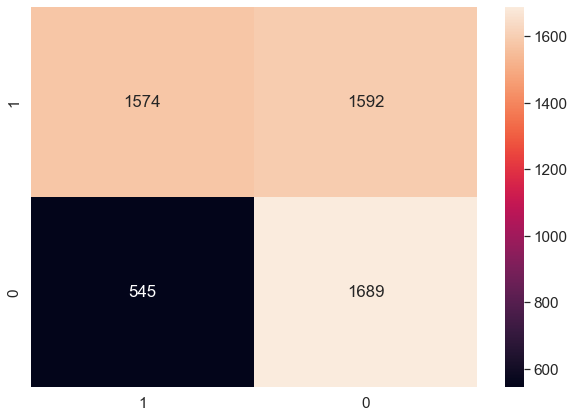

In [141]:
# 그렇다면 이 feature 들만 사용해서 모델 구축을 해보자
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train[x_train.columns[rfe.support_]], y_train)

y_pred = classifier.predict(x_test[x_test.columns[rfe.support_]])

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

## 모델 완성

In [142]:
pd.concat([pd.DataFrame(x_train.columns[rfe.support_], columns = ['features']),
          pd.DataFrame(np.transpose(classifier.coef_), columns=['coef'])],
         axis=1)

,features,coef
0,age,-0.149124
1,deposits,0.668789
2,withdrawal,0.055475
3,purchases_partners,-0.723518
4,purchases,-0.825006
5,cc_taken,0.085660
6,cc_recommended,0.077492
7,cc_application_begin,0.045200
8,app_downloaded,-0.047746
9,web_user,0.131138


In [144]:
final_results = pd.concat([y_test, user_identifier], axis=1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user','churn','predicted_churn']].reset_index(drop=True)

In [145]:
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,1
5396,24291,1.0,1
5397,23740,0.0,1
5398,47663,1.0,0
